# Case Study: How Can a Wellness Technology play it smart

### Scenario 
You are a junior data analyst working on the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused
products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the
global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart
device fitness data could help unlock new growth opportunities for the company. You have been asked to focus on one of
Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The
insights you discover will then help guide marketing strategy for the company. You will present your analysis to the Bellabeat
executive team along with your high-level recommendations for Bellabeat’s marketing strategy

### Characters and products
● Characters

○ Urška Sršen: 
  Bellabeat’s cofounder and Chief Creative Officer

○ Sando Mur: 
  Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team

○ Bellabeat marketing analytics team: 
  A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy. You joined this team six months ago and have been busy learning about Bellabeat’’s mission and business goals — as well as how you, as a junior data analyst, can help Bellabeat achieve them.


● Products

○ Bellabeat app: 
The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products.

○ Leaf: 
Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects to the Bellabeat app to track activity, sleep, and stress.

○ Time: 
This wellness watch combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your daily wellness.

○ Spring: 
This is a water bottle that tracks daily water intake using smart technology to ensure that you are appropriately hydrated throughout the day. The Spring bottle connects to the Bellabeat app to track your hydration levels.

○ Bellabeat membership: 
Bellabeat also offers a subscription-based membership program for users Membership gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and
beauty, and mindfulness based on their lifestyle and goals.

### Ask
### Sršen asks you to analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart
devices. She then wants you to select one Bellabeat product to apply these insights to in your presentation. These questions
will guide your analysis:
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

You will produce a report with the following deliverables:
1. A clear summary of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of your analysis
5. Supporting visualizations and key findings
6. Your top high-level content recommendations based on your analysis

### Prepare
Sršen encourages you to use public data that explores smart device users’ daily habits. She points you to a specific data set:
FitBit Fitness Tracker Data (CC0: Public Domain, dataset made available through Mobius): This Kaggle data set contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits. 

Sršen tells you that this data set might have some limitations, and encourages you to consider adding another data to help address those limitations as you begin to work more with this data.

### Process

In [1]:
#For this activity I will be analyzing 5 data sets, as imported below.

In [2]:
import pandas as pd
import numpy as np
daily_activity = pd.read_csv("dailyActivity_merged.csv")
dcalories = pd.read_csv("dailyCalories_merged.csv")
dintensities = pd.read_csv("dailyIntensities_merged.csv")
dsteps = pd.read_csv("dailySteps_merged.csv")
dsleep = pd.read_csv("sleepDay_merged.csv")

In [3]:
daily_activity.nunique()

Id                           33
ActivityDate                 31
TotalSteps                  842
TotalDistance               615
TrackerDistance             613
LoggedActivitiesDistance     19
VeryActiveDistance          333
ModeratelyActiveDistance    211
LightActiveDistance         491
SedentaryActiveDistance       9
VeryActiveMinutes           122
FairlyActiveMinutes          81
LightlyActiveMinutes        335
SedentaryMinutes            549
Calories                    734
dtype: int64

In [4]:
dcalories.nunique()

Id              33
ActivityDay     31
Calories       734
dtype: int64

In [5]:
dintensities.nunique()

Id                           33
ActivityDay                  31
SedentaryMinutes            549
LightlyActiveMinutes        335
FairlyActiveMinutes          81
VeryActiveMinutes           122
SedentaryActiveDistance       9
LightActiveDistance         491
ModeratelyActiveDistance    211
VeryActiveDistance          333
dtype: int64

In [6]:
dsteps.nunique()

Id              33
ActivityDay     31
StepTotal      842
dtype: int64

In [7]:
dsleep.nunique()

Id                     24
SleepDay               31
TotalSleepRecords       3
TotalMinutesAsleep    256
TotalTimeInBed        242
dtype: int64

In [8]:
#Every data set but Sleep data has 33 unique Ids, so there might be a correlation among these 4 data set. Lets varify that.

In [9]:
daily_activity

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [10]:
dcalories

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863
...,...,...,...
935,8877689391,5/8/2016,2847
936,8877689391,5/9/2016,3710
937,8877689391,5/10/2016,2832
938,8877689391,5/11/2016,3832


In [11]:
dintensities

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.00,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.00,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.00,3.91,0.40,2.44
3,1503960366,4/15/2016,726,209,34,29,0.00,2.83,1.26,2.14
4,1503960366,4/16/2016,773,221,10,36,0.00,5.04,0.41,2.71
...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,1174,245,4,17,0.00,6.80,0.20,1.08
936,8877689391,5/9/2016,1131,217,19,73,0.05,6.24,0.80,11.10
937,8877689391,5/10/2016,1187,224,11,18,0.00,6.28,0.46,1.35
938,8877689391,5/11/2016,1127,213,12,88,0.00,5.89,0.41,13.22


In [12]:
dsteps

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669
...,...,...,...
935,8877689391,5/8/2016,10686
936,8877689391,5/9/2016,20226
937,8877689391,5/10/2016,10733
938,8877689391,5/11/2016,21420


### Analyze

In [13]:
#All thes 4 data set has exactly 940 rows, and it seems like daily_activity contains data of all other data set. lets varify that. we can clearly see that Ids of every data are in same order, so to varify we would randomly pick a column from both the data set and check if values matches.

In [14]:
dcalories["both_matches"]= np.where(daily_activity["Calories"] == dcalories["Calories"],True,False)
dcalories.head(2)

,Id,ActivityDay,Calories,both_matches
0,1503960366,4/12/2016,1985,True
1,1503960366,4/13/2016,1797,True


In [15]:
#for new column which has result of the match, it returns True, lets see if there is any false value also

In [16]:
dcalories.nunique()

Id               33
ActivityDay      31
Calories        734
both_matches      1
dtype: int64

In [17]:
#both_matches column has only one kind of value,i.e. True. lets check that for other data set also.

In [18]:
dintensities["both_matches"]= np.where(((daily_activity["VeryActiveMinutes"] == dintensities["VeryActiveMinutes"])),True,False)
dintensities.head(2)

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,both_matches
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88,True
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57,True


In [19]:
dintensities.nunique()

Id                           33
ActivityDay                  31
SedentaryMinutes            549
LightlyActiveMinutes        335
FairlyActiveMinutes          81
VeryActiveMinutes           122
SedentaryActiveDistance       9
LightActiveDistance         491
ModeratelyActiveDistance    211
VeryActiveDistance          333
both_matches                  1
dtype: int64

In [20]:
dsteps["both_matches"]= np.where(((daily_activity["TotalSteps"] == dsteps["StepTotal"])),True,False)
dsteps.head(2)

,Id,ActivityDay,StepTotal,both_matches
0,1503960366,4/12/2016,13162,True
1,1503960366,4/13/2016,10735,True


In [21]:
dsteps.nunique()

Id               33
ActivityDay      31
StepTotal       842
both_matches      1
dtype: int64

In [22]:
#So this confirms that our daily_activity data set has same data as other data set.

In [23]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [24]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [25]:
#Checking for data type---data type of activitydate is object so i am converting it to datetime

In [26]:
daily_activity["ActivityDate"] =pd.to_datetime(daily_activity["ActivityDate"])
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [27]:
#now i will check for null values if any

In [28]:
daily_activity.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [29]:
#checking for duplicate

In [30]:
daily_activity.duplicated().sum()

0

In [31]:
daily_activity

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [32]:
#lets find out total minutes since veryactive, fairly active. lightlyactive, sedentary minutes dont make much of sence alone.

In [33]:
daily_activity["total_minutes"] =   (daily_activity["VeryActiveMinutes"] + 
                                    daily_activity["FairlyActiveMinutes"] + 
                                    daily_activity["LightlyActiveMinutes"] + 
                                    daily_activity["SedentaryMinutes"])  

In [34]:
daily_activity

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,total_minutes
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,1094
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,1033
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,1440
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,998
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,1040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,1440
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,1440
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,1440
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,1440


In [35]:
#now lets find out percentage sedentary minutes

In [36]:
daily_activity["perct_sedentary_minutes"] = ((daily_activity["SedentaryMinutes"]*100)/daily_activity["total_minutes"])

In [37]:
daily_activity

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,total_minutes,perct_sedentary_minutes
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,1094,66.544790
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,1033,75.121007
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,1440,84.583333
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,998,72.745491
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,1040,74.326923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,1440,81.527778
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,1440,78.541667
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,1440,82.430556
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,1440,78.263889


In [38]:
#now lets find out average sedentary minutes in terms of percentage.

In [39]:
daily_activity["perct_sedentary_minutes"].mean()

79.98371119665137

In [40]:
#so average percentage sedentary time is around 80% 
# this is our first Ahaa moment

In [41]:
#now lets Plot total steps vs calories chart

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (12,12)

Text(0.5, 0, 'total steps')

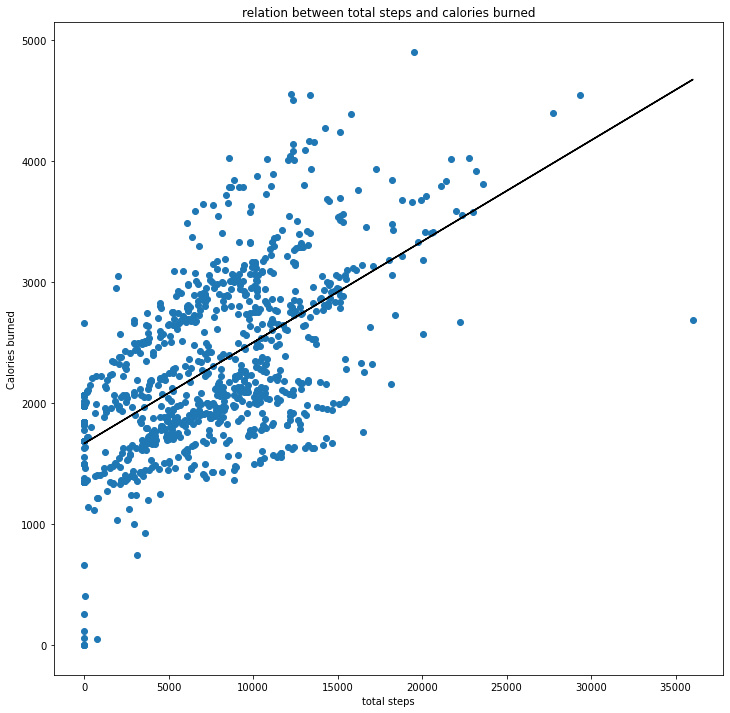

In [43]:
x = daily_activity["TotalSteps"]
y = daily_activity["Calories"]
plt.scatter(x,y)
z= np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x), color = "black")
plt.title('relation between total steps and calories burned')
plt.ylabel('Calories burned')
plt.xlabel('total steps')

In [44]:
#as aspected there is positive correlation between

Text(0.5, 0, 'lightly active minutes')

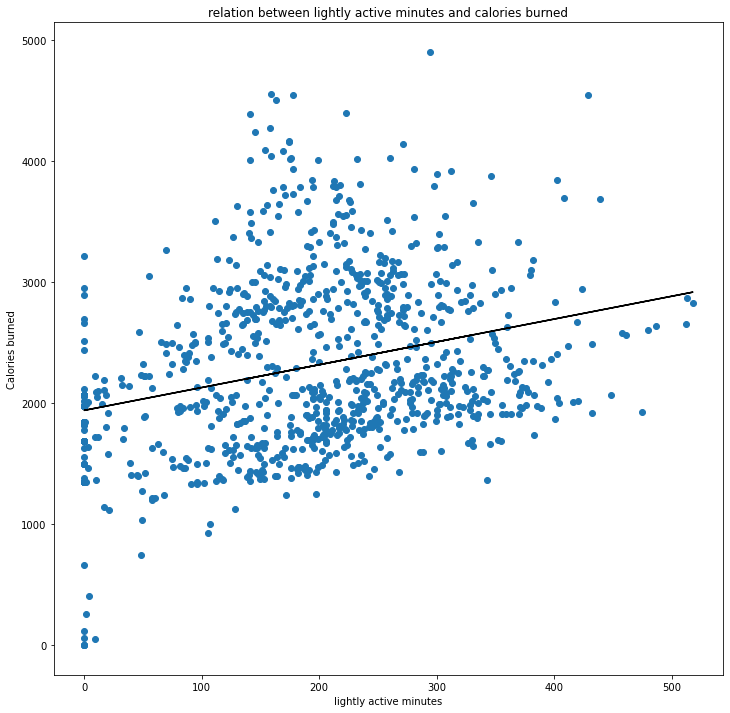

In [45]:
x = daily_activity["LightlyActiveMinutes"]
y = daily_activity["Calories"]
plt.scatter(x,y)
z= np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x), color = "black")
plt.title('relation between lightly active minutes and calories burned')
plt.ylabel('Calories burned')
plt.xlabel('lightly active minutes')

In [46]:
#although this relation between calories burned and lightly active minutesis not very strongly positive but still we conclude from above two graphs that even lighlt active minute or just walk can help us burn calories. 

Text(0.5, 0, 'Very Active Minutes')

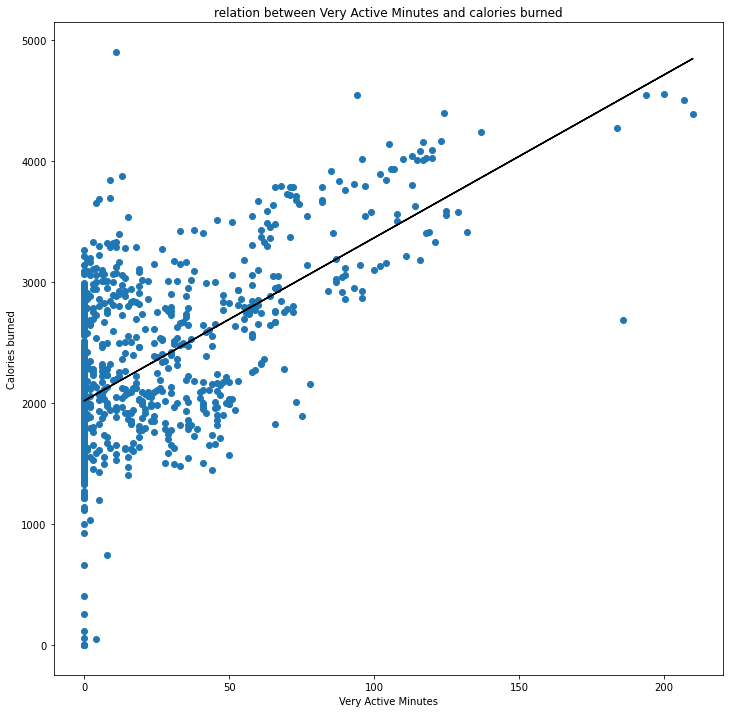

In [47]:
x = daily_activity["VeryActiveMinutes"]
y = daily_activity["Calories"]
plt.scatter(x,y)
z= np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x), color = "black")
plt.title('relation between Very Active Minutes and calories burned')
plt.ylabel('Calories burned')
plt.xlabel('Very Active Minutes')

In [48]:
#and we can clearly see that very active minute has strongly positive correlation with calories burned.
#this is our second Ahaa moment complimenting to the first one.

In [49]:
#now lets analyze our sleep data.

In [50]:
dsleep

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
...,...,...,...,...,...
408,8792009665,4/30/2016 12:00:00 AM,1,343,360
409,8792009665,5/1/2016 12:00:00 AM,1,503,527
410,8792009665,5/2/2016 12:00:00 AM,1,415,423
411,8792009665,5/3/2016 12:00:00 AM,1,516,545


In [51]:
dsleep.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


In [52]:
#from this we can see ther is differnence between total minutes asleep and total time in bed, lets plot it to see clear picture.

Text(0.5, 0, 'total minutes asleep')

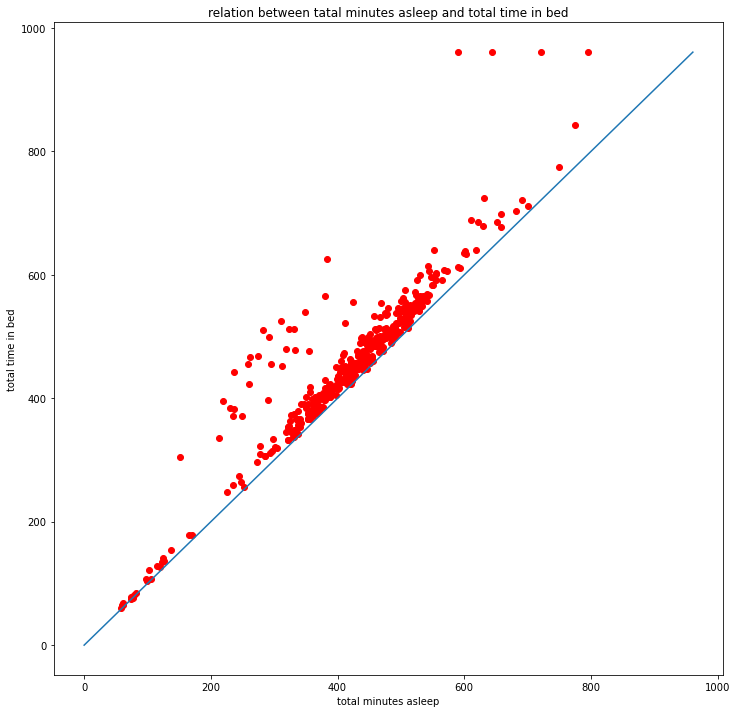

In [53]:
y = dsleep["TotalTimeInBed"]
x = dsleep["TotalMinutesAsleep"] 
plt.scatter(x,y,color = "red")
plt.plot([0,961],[0,961])
plt.title("relation between tatal minutes asleep and total time in bed")
plt.ylabel("total time in bed")
plt.xlabel("total minutes asleep")

In [54]:
#we can see see from above plot that people tend to sleep late even after being on bed.
# this is our third Ahaa moment.

## Conclusion

   1) Majority of people who use fitbit are inactive or very less active.
   
   2) Many of people tend to sleep late after lying on bed

### Share

In [55]:
daily_activity.head(2)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,total_minutes,perct_sedentary_minutes
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1094,66.544790
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,1033,75.121007


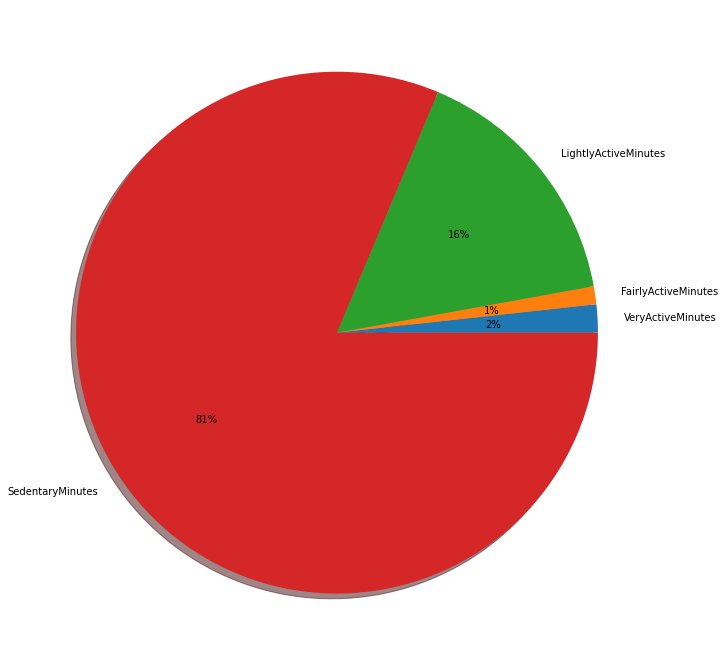

In [56]:
q = [daily_activity["VeryActiveMinutes"].mean() , daily_activity["FairlyActiveMinutes"].mean(), daily_activity["LightlyActiveMinutes"].mean(), daily_activity["SedentaryMinutes"].mean()]
my_label = ["VeryActiveMinutes", "FairlyActiveMinutes","LightlyActiveMinutes","SedentaryMinutes"]
plt.pie(q, labels = my_label, autopct='%1.0f%%' ,shadow = True)
plt.show()

#### Above Chart clearly shows that 81% of time people are Sedentary and 16% of time lightly active wearing Fitbit

In [57]:
#now for sleep data

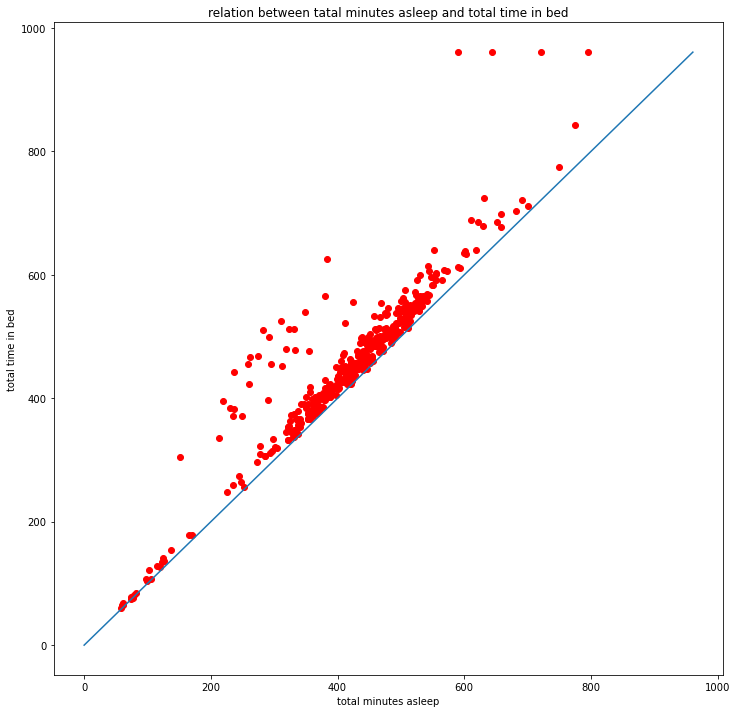

In [58]:
y = dsleep["TotalTimeInBed"]
x = dsleep["TotalMinutesAsleep"] 
plt.scatter(x,y,color = "red")
plt.plot([0,961],[0,961])
plt.title("relation between tatal minutes asleep and total time in bed")
plt.ylabel("total time in bed")
plt.xlabel("total minutes asleep")
plt.show()

#### Above chart shows that many of people tend to sleep late even after lying on the bed.

### Act

#### We should start some campaign or some kind of reward system to encourage people to be active, so that people will actually use fitness tracking product for what it is designed.
#### We should also intoduce sleep reminder in our fitness tracking device encouraging people to sleep on time.